<a href="https://colab.research.google.com/github/sipun40/CNN_network/blob/main/CNN_netwoek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FOOD-101 images Classification in Google Colab -Full Explanation

In [ ]:
# STEP 1: Install Tenorflow Datasets
#!pip install tensorflow-datasets

'''what this does:
we install tenserflow datasets'''

'what this does:\nwe install tenserflow datasets'

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#STEP 3: load the food-101 datasets
(ds_train, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.7G2WP4_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.7G2WP4_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
#STEP 4: View Datsets Information
print("Total Classes:",ds_info.features['label'].num_classes)
print("Sample Clases:",ds_info.features['label'].names[:10])


Total Classes: 101
Sample Clases: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [ ]:
#STEP 5: Preprocess the IMages
IMG_SIZE = 224
BATCH_SIZE = 32
def preprocess(image, label):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  image = tf.cast(image, tf.float32)/255.0
  return image, label
#Apply preprocessing to the datasets
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

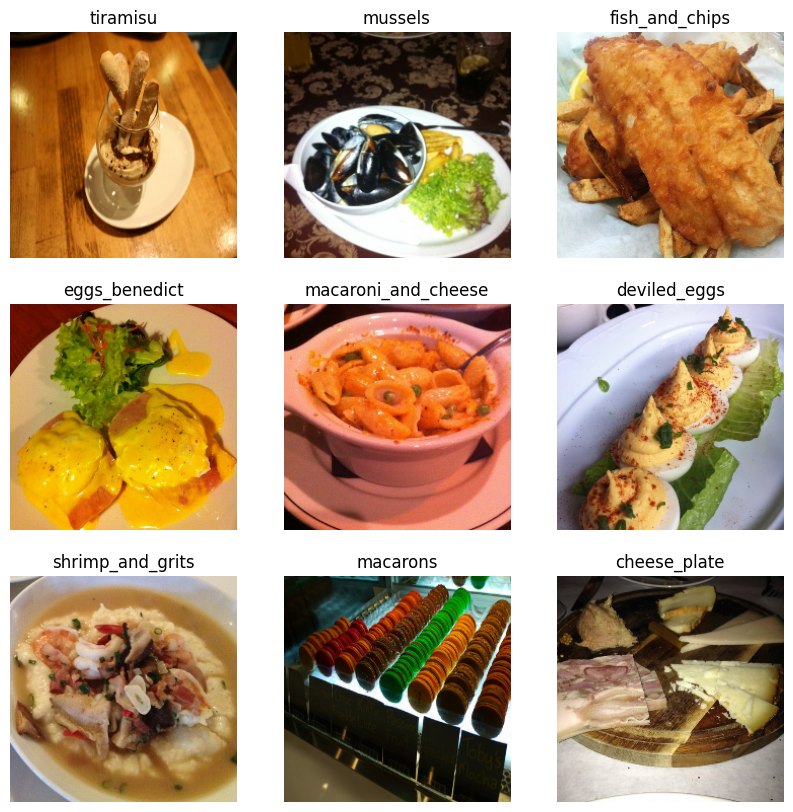

In [ ]:
#step 6 :Visualize Image
for images, labels in ds_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(9): # Outer loop iterates through 9 images
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy())
    label = ds_info.features['label'].int2str(labels[i].numpy())
    plt.title(label)
    plt.axis('off')
  plt.show() # Show the figure with 9 images after the outer loop completes

In [ ]:
from pickle import FALSE
#STEP 7 : Build the CNN Model (Transfer Learing)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet',
)
base_model.trainable = False
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(101, activation='softmax'),
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#STEP 8: Compile the MOdel
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#STEP 9 :Train the Model
history = model.fit(ds_train, epochs=5, validation_data=ds_test)

NameError: name 'model' is not defined

In [ ]:
#STEP 10 : Evaluate the model
loss, accuracy = model.evaluate(ds_test)
print(f'Test Accuracy:{accuracy * 100:2f}%')

In [ ]:
#STEP 11 : Make Predictions & Show Results
class_names = ds_info.features['label'].names
for image, label in ds_test.take(1):
  image = image[0]
  true_label= class_names[labels[0].numpy()]
  prediction = model.predict(tf.expand_dims(image, axis=0))
  predicted_label = class_names[np.argmax(prediction)]
  plt.imshow(image)
  plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
  plt.axis('off')
  plt.show()

In [ ]:
#STEP 12 : Save the Trained Model (optional)
model.save("food101_model.h5")